<a href="https://www.kaggle.com/code/seunayegboyin/credit-score-with-stacking-classifier-ensembles?scriptVersionId=121895545" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Problem Statement
You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.
## Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
import re

from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import (BaggingClassifier,
                              ExtraTreesClassifier,
                              RandomForestClassifier, 
                              StackingClassifier,
                              HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report,
                             accuracy_score, 
                             precision_score,
                             recall_score,
                             f1_score )

from sklearn.preprocessing import OrdinalEncoder
from IPython.display import display

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/kaggle/input/credit-score-classification-data/train.csv')
data.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99121,0x25acb,CUS_0x4dc9,February,Sagarikat,38,011-55-5907,Doctor,47689.47,3787.122500,9,...,_,4675.57,33.873447,10 Years and 10 Months,Yes,194.627520,44.294517224033406,High_spent_Medium_value_payments,389.790213,Standard
41289,0x107ef,CUS_0x1cee,February,Greg Roumeliotisr,55,541-87-1826,Teacher,59782.0,5114.833333,0,...,_,264.0,26.233683,23 Years and 11 Months,No,155.909143,79.11094203241367,High_spent_Medium_value_payments,526.4632481051783,Good
93075,0x2375d,CUS_0xb226,April,Miyoung Kimm,40,117-54-0611,Scientist,115494.2,9465.516667,1,...,Good,1335.24,30.568932,25 Years and 0 Months,No,106.577978,115.04873460284756,High_spent_Large_value_payments,964.9249539905272,Standard
57412,0x16666,CUS_0x2004,May,Henning Gloysteinb,27,925-81-5909,Entrepreneur,73420.92,6333.410000,4,...,Good,278.08,41.131584,30 Years and 9 Months,No,67.044384,86.39278504340099,High_spent_Medium_value_payments,729.9038314272287,Good
54731,0x156b1,CUS_0x36f2,April,Phil Wahbag,40,661-06-7195,Scientist,15366.215,NaN,4,...,Standard,189.59,38.476575,29 Years and 4 Months,No,9.091012,82.83628288630733,Low_spent_Small_value_payments,297.7244964766219,Standard
71375,0x1b835,CUS_0xc62a,August,NaN,37,320-50-8109,Entrepreneur,70088.36,6090.696667,6,...,Bad,4670.21,38.510084,14 Years and 5 Months,Yes,413.331648,71.61745397040211,High_spent_Medium_value_payments,374.120564290015,Poor
78337,0x1e103,CUS_0x4fa3,February,NaN,55,773-79-4897,Mechanic,166741.48,NaN,4,...,_,117.12,28.627795,31 Years and 6 Months,No,337.255643,1232.551588388199,!@9#%8,133.30510194234603,Good
80319,0x1ec9d,CUS_0xac1a,August,NaN,39,922-25-7734,Mechanic,10389.19,833.765833,3,...,Standard,356.69,23.508822,12 Years and 2 Months,NM,37.478344,22.312209192917376,Low_spent_Medium_value_payments,303.5860299112459,Standard
97549,0x25193,CUS_0xa3df,June,Stephen Greyv,47,208-84-0945,Scientist,33669.54,2571.795000,5,...,Good,741.68,31.702890,27 Years and 6 Months,No,54.036977,62.600512986751006,High_spent_Medium_value_payments,390.54201001475786,Standard
98081,0x254b3,CUS_0x4fb1,February,NaN,21,157-31-1348,Developer,18289.68,1305.140000,6,...,Bad,4266.37,35.179882,NaN,NM,99.102924,61.879602440463906,Low_spent_Medium_value_payments,249.53147372307856,Poor


In [3]:
# Data Decription
data.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,...,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,...,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,NaN,NaN,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,...,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,...,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,...,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,...,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,...,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,...,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


In [4]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
# Checking for missing values
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Data cleaning

In [6]:
# cleaning Outstanding Debt
data['Outstanding_Debt']=data['Outstanding_Debt'].str.extract('(\d+)')
# cleaning Annual income
data['Annual_Income']=data['Annual_Income'].str.extract('(\d+)')
# cleaning changed credit limit
data['Changed_Credit_Limit']=data['Changed_Credit_Limit'].str.extract('(\d+)')
# Cleaning Number of loan
data['Num_of_Loan']=data['Num_of_Loan'].str.extract('(\d+)')
# Cleaning Age
data['Age']=data['Age'].str.extract('(\d+)')
# Cleaning Amount invested monthly
data['Amount_invested_monthly']=(data['Amount_invested_monthly'].astype('str')).str.extract('(\d+)')
# Cleaning Monthly Balance
data['Monthly_Balance']=(data['Monthly_Balance'].astype('str')).str.extract('(\d+)')
# Cleaning Number of Delayed Payment 
data['Num_of_Delayed_Payment']=data['Num_of_Delayed_Payment'].str.extract('(\d+)')
# Filling the None values with the median of Num of Delayed payment through simpleimputer
si=SimpleImputer(strategy='median')
si=si.fit_transform(data[['Num_of_Delayed_Payment']])
data[['Num_of_Delayed_Payment']]=si

In [7]:
# Credit_History_Age filtering
def History_age(age):
    try : 
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except :
        return np.nan

In [8]:
data['Credit_History_Age'] = data['Credit_History_Age'].apply(History_age)

In [9]:
# filling empty value with most frequent value
si_type_of_loan=SimpleImputer(strategy='most_frequent')
si_type_of_loan=si_type_of_loan.fit(data[['Type_of_Loan']])
data[['Type_of_Loan']]=si_type_of_loan.transform(data[['Type_of_Loan']])

In [10]:
''' 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
     'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month','Monthly_Balance',
       'Amount_invested_monthly','Credit_History_Age','Changed_Credit_Limit '''

si=SimpleImputer()
si=si.fit(data[['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month','Monthly_Balance','Amount_invested_monthly','Credit_History_Age','Changed_Credit_Limit']])
si=si.transform(data[['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month','Monthly_Balance','Amount_invested_monthly','Credit_History_Age','Changed_Credit_Limit']])
data[['Monthly_Inhand_Salary','Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate','Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio','Total_EMI_per_month','Monthly_Balance',
      'Amount_invested_monthly','Credit_History_Age','Changed_Credit_Limit']]=si

In [11]:
data.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        9985
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [12]:
# Deleting columns that are not relevant for the model
del data['ID']
del data['Name']
del data['Customer_ID']
del data['SSN']

In [13]:
data.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [14]:
data.select_dtypes(include='object').head()

,Month,Age,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,23,Scientist,19114,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,809,No,High_spent_Small_value_payments,Good
1,February,23,Scientist,19114,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,809,No,Low_spent_Large_value_payments,Good
2,March,500,Scientist,19114,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,809,No,Low_spent_Medium_value_payments,Good
3,April,23,Scientist,19114,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,809,No,Low_spent_Small_value_payments,Good
4,May,23,Scientist,19114,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,809,No,High_spent_Medium_value_payments,Good


In [15]:
#convertion to integer
data[['Age', 'Annual_Income', 'Num_of_Loan','Outstanding_Debt']]=data[['Age', 'Annual_Income', 'Num_of_Loan','Outstanding_Debt']].astype('int64')

In [16]:
data.select_dtypes(include='object').head()

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,No,High_spent_Small_value_payments,Good
1,February,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,March,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good


In [17]:
data.select_dtypes(exclude='object').head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,19114,1824.843333,3.0,4.0,3.0,4,3.0,7.0,11.000000,4.0,809,26.822620,265.000000,49.574949,80.0,312.0
1,23,19114,4194.170850,3.0,4.0,3.0,4,-1.0,14.0,11.000000,4.0,809,31.944960,221.195405,49.574949,118.0,284.0
2,500,19114,4194.170850,3.0,4.0,3.0,4,3.0,7.0,9.965682,4.0,809,28.609352,267.000000,49.574949,81.0,331.0
3,23,19114,4194.170850,3.0,4.0,3.0,4,5.0,4.0,6.000000,4.0,809,31.377862,268.000000,49.574949,199.0,223.0
4,23,19114,1824.843333,3.0,4.0,3.0,4,6.0,14.0,11.000000,4.0,809,24.797347,269.000000,49.574949,41.0,341.0


In [18]:
data.Age=np.random.randint(18,100,100000)
data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,22,Scientist,19114,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809,26.822620,265.000000,No,49.574949,80.0,High_spent_Small_value_payments,312.0,Good
1,February,27,Scientist,19114,4194.170850,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809,31.944960,221.195405,No,49.574949,118.0,Low_spent_Large_value_payments,284.0,Good
2,March,34,Scientist,19114,4194.170850,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809,28.609352,267.000000,No,49.574949,81.0,Low_spent_Medium_value_payments,331.0,Good
3,April,82,Scientist,19114,4194.170850,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809,31.377862,268.000000,No,49.574949,199.0,Low_spent_Small_value_payments,223.0,Good
4,May,26,Scientist,19114,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809,24.797347,269.000000,No,49.574949,41.0,High_spent_Medium_value_payments,341.0,Good


## OCCUPATION

In [19]:
print(data.select_dtypes(include='object')['Occupation'].value_counts())
fig=px.bar(data.select_dtypes(include='object')['Occupation'].value_counts())
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


In [20]:
#cleaning Occupation
data['Occupation'].replace('_______','others',inplace=True)

In [21]:
# visualization after cleaning
print(data.select_dtypes(include='object')['Occupation'].value_counts())
fig=px.bar(data.select_dtypes(include='object')['Occupation'].value_counts())
fig.show()

others           7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


## Credit Mix

In [22]:
print(data.select_dtypes(include='object')['Credit_Mix'].value_counts().sort_values())
fig=px.bar(data.select_dtypes(include='object')['Credit_Mix'].value_counts().sort_values())
fig.show()

Bad         18989
_           20195
Good        24337
Standard    36479
Name: Credit_Mix, dtype: int64


In [23]:
# Cleaning Credit Mix
# Good
good=data[['Credit_Mix','Credit_Score']][data['Credit_Score']=='Good']['Credit_Mix'].replace('_','Good')
# Standard
standard=data[['Credit_Mix','Credit_Score']][data['Credit_Score']=='Standard']['Credit_Mix'].replace('_','Standard')
# poor/Bad
bad=data[['Credit_Mix','Credit_Score']][data['Credit_Score']=='Poor']['Credit_Mix'].replace('_','Bad')
g_s_b=pd.concat([good,standard,bad])
g_s_b.sort_index(inplace=True)
data['Credit_Mix']=g_s_b

In [24]:
# Visualizationc After Cleaning Credit Mix
print(data.select_dtypes(include='object')['Credit_Mix'].value_counts().sort_values())
fig=px.bar(data.select_dtypes(include='object')['Credit_Mix'].value_counts().sort_values())
fig.show()

Bad         24858
Good        27959
Standard    47183
Name: Credit_Mix, dtype: int64


In [25]:
print(data['Payment_of_Min_Amount'].value_counts())
fig=px.bar(data['Payment_of_Min_Amount'].value_counts())
fig.show()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64


In [26]:
# Cleaning payment of minimum amount
data['Payment_of_Min_Amount'].replace('NM','No',inplace=True)

In [27]:
# Visualization after cleaning
print(data['Payment_of_Min_Amount'].value_counts())
fig=px.bar(data['Payment_of_Min_Amount'].value_counts())
fig.show()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64


In [28]:
print(data['Payment_Behaviour'].value_counts())
fig=px.bar(data['Payment_Behaviour'].value_counts())
fig.show()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64


In [29]:
# cleaning payment behaviour 
data['Payment_Behaviour'].replace('!@9#%8','other',inplace=True)

In [30]:
# visualization after cleaning
print(data['Payment_Behaviour'].value_counts())
fig=px.bar(data['Payment_Behaviour'].value_counts())
fig.show()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
other                                7600
Name: Payment_Behaviour, dtype: int64


In [31]:
print(data['Credit_Score'].value_counts())
fig=px.bar(data['Credit_Score'].value_counts())
fig.show()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64


In [32]:
# Age visualization
fig=px.scatter(data['Age'].value_counts())
fig.show()

In [33]:
# Converting object to float
data[['Annual_Income','Num_of_Loan','Changed_Credit_Limit','Outstanding_Debt']]=data[['Annual_Income','Num_of_Loan','Changed_Credit_Limit','Outstanding_Debt']].astype('float64')

In [34]:
data.sample(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
33390,July,87,Architect,69860.0,5620.681667,4.0,5.0,11.0,3.0,"Personal Loan, Credit-Builder Loan, and Auto Loan",...,Standard,859.0,26.617112,140.0,No,92.558978,143.0,High_spent_Small_value_payments,586.0,Standard
62966,July,33,Accountant,63523.0,5438.623333,7.0,7.0,19.0,5.0,"Home Equity Loan, Personal Loan, Debt Consolid...",...,Standard,1884.0,23.798110,191.0,Yes,237.073019,446.0,Low_spent_Medium_value_payments,140.0,Poor
33316,May,70,Scientist,15410.0,1554.182500,10.0,5.0,28.0,6.0,"Auto Loan, Payday Loan, Payday Loan, Payday Lo...",...,Bad,1257.0,23.379820,169.0,Yes,39.628117,202.0,other,203.0,Poor
54633,February,75,Media_Manager,15591.0,1349.280833,5.0,7.0,26.0,2.0,"Not Specified, and Credit-Builder Loan",...,Standard,1314.0,32.936150,75.0,Yes,16.356494,32.0,High_spent_Large_value_payments,325.0,Poor
58764,May,49,Scientist,97612.0,8014.345000,8.0,4.0,9.0,4.0,"Personal Loan, Payday Loan, Debt Consolidation...",...,Standard,1477.0,24.190156,127.0,Yes,261.583426,451.0,Low_spent_Small_value_payments,378.0,Poor


In [35]:
# Cleaning type of loan
data['Type_of_Loan']=pd.DataFrame(data['Type_of_Loan'].value_counts().head(9).index[:])

In [36]:
data['Type_of_Loan']

0                  Not Specified
1            Credit-Builder Loan
2                  Personal Loan
3        Debt Consolidation Loan
4                   Student Loan
                  ...           
99995                        NaN
99996                        NaN
99997                        NaN
99998                        NaN
99999                        NaN
Name: Type_of_Loan, Length: 100000, dtype: object

In [37]:
Type_of_Loan=['Not Specified','Credit-Builder Loan'
,'Personal Loan','Debt Consolidation Loan','Student Loan']
data['Type_of_Loan']=np.random.choice(Type_of_Loan,100000,p=(np.arange(1,6)/np.arange(1,6).sum()))

In [38]:
data['Type_of_Loan'].value_counts()

Student Loan               33252
Debt Consolidation Loan    26697
Personal Loan              19962
Credit-Builder Loan        13358
Not Specified               6731
Name: Type_of_Loan, dtype: int64

In [39]:
data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,22,Scientist,19114.0,1824.843333,3.0,4.0,3.0,4.0,Not Specified,...,Good,809.0,26.822620,265.000000,No,49.574949,80.0,High_spent_Small_value_payments,312.0,Good
1,February,27,Scientist,19114.0,4194.170850,3.0,4.0,3.0,4.0,Debt Consolidation Loan,...,Good,809.0,31.944960,221.195405,No,49.574949,118.0,Low_spent_Large_value_payments,284.0,Good
2,March,34,Scientist,19114.0,4194.170850,3.0,4.0,3.0,4.0,Credit-Builder Loan,...,Good,809.0,28.609352,267.000000,No,49.574949,81.0,Low_spent_Medium_value_payments,331.0,Good
3,April,82,Scientist,19114.0,4194.170850,3.0,4.0,3.0,4.0,Student Loan,...,Good,809.0,31.377862,268.000000,No,49.574949,199.0,Low_spent_Small_value_payments,223.0,Good
4,May,26,Scientist,19114.0,1824.843333,3.0,4.0,3.0,4.0,Student Loan,...,Good,809.0,24.797347,269.000000,No,49.574949,41.0,High_spent_Medium_value_payments,341.0,Good


In [40]:
data.select_dtypes(include='object').columns

Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [41]:
for i in data.select_dtypes(include='object').columns:
    display(data.groupby(i).mean())

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Month,,,,,,,,,,,,,,,,,
April,58.31520,167708.35944,4193.111497,18.09792,24.11136,69.66848,10.04872,21.07144,30.50704,9.958605,31.721979,1425.7224,32.220357,220.603186,1232.813325,636.299583,2.702618e+22
August,58.39824,161620.05968,4187.790064,16.93992,23.17272,73.21336,11.09944,21.06088,31.68360,9.981303,26.322387,1425.7224,32.349265,224.244468,1488.394291,638.259733,2.702375e+22
February,58.96664,168024.98144,4209.205706,18.92384,20.95240,75.61296,10.55440,21.06888,31.05512,10.009349,26.762429,1425.7224,32.259263,218.982860,1621.135569,616.384601,8.041296e+22
January,58.07168,188861.20488,4198.677457,17.27512,21.64768,69.46520,11.32456,21.05144,30.13456,9.973206,24.651360,1425.7224,32.291949,217.909319,1303.781040,642.549120,3.255061e+20
July,58.10872,161637.01728,4175.220729,15.87192,22.66088,73.22480,10.52400,21.09096,26.68872,9.980351,29.504583,1425.7224,32.258331,223.562223,1356.220451,631.945528,8.036437e+22
June,58.35184,195048.23696,4190.428178,15.36328,21.48848,70.45808,10.98528,21.05896,27.21912,9.923162,29.243537,1425.7224,32.293875,222.371346,1460.215449,639.492772,3.740891e+20
March,58.40640,189170.30880,4203.739125,17.44168,22.15256,72.92832,10.88736,21.07416,30.47440,9.934056,25.342623,1425.7224,32.302113,220.003376,1365.147662,650.535520,2.702618e+22
May,58.23056,179251.50208,4195.194041,16.81656,23.60936,75.15712,10.67192,21.07352,30.31496,9.965427,28.485109,1425.7224,32.306227,221.886463,1397.237947,640.023433,3.619433e+20


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Occupation,,,,,,,,,,,,,,,,,
Accountant,57.882315,198570.425291,4218.615340,18.812789,23.798278,66.062032,11.000478,21.093287,30.596396,10.346244,28.032539,1430.797480,32.289765,220.373211,1477.712866,601.707107,4.260987e+20
Architect,58.246892,168015.053973,4271.010109,18.755625,23.880094,70.185208,10.859638,20.486703,28.129190,9.644231,25.595796,1348.735327,32.333895,225.783178,1578.758029,661.450226,3.822423e+20
Developer,58.160545,168694.106014,4151.766080,17.564876,22.277466,76.565838,10.279391,21.204651,27.047955,10.193870,29.439421,1436.410265,32.276707,219.155177,1488.808788,601.653884,5.377819e+22
Doctor,58.514703,191924.876129,4120.814156,17.490061,23.515689,71.794809,10.286184,20.830951,26.596353,9.964150,28.355146,1443.913915,32.222652,221.552910,1224.877450,631.083794,1.100219e+23
Engineer,58.284882,173880.363622,4243.345720,18.645197,19.458583,63.266929,12.116535,21.739528,28.115748,10.222545,28.324412,1453.073701,32.399368,217.156802,1268.056955,657.020940,5.277078e+22
Entrepreneur,58.218659,183450.552478,4229.382657,15.595076,24.959832,71.584710,11.000810,21.155977,30.146259,9.569533,30.318475,1400.067865,32.209873,222.049379,1488.261642,620.329699,3.688578e+20
Journalist,58.376500,157594.767954,4030.639561,17.212983,21.470501,77.098767,9.911093,20.234018,29.305012,9.851521,28.952763,1450.385374,32.178526,225.322861,1217.099633,627.589089,1.099582e+23
Lawyer,59.196350,196039.379163,4144.083205,16.351635,23.692624,75.791939,10.832700,20.883802,31.947985,9.894882,25.941176,1350.060532,32.199054,220.270345,1280.107621,634.232937,5.102497e+22
Manager,58.441822,159213.187510,4262.300012,16.336012,22.560188,81.707350,11.255650,21.301021,32.558011,9.980658,28.681303,1464.740499,32.426765,222.033677,1419.519308,639.727207,3.609360e+20


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Type_of_Loan,,,,,,,,,,,,,,,,,
Credit-Builder Loan,58.351400,187355.746369,4207.453381,16.784848,22.651669,69.055922,11.766806,21.039976,30.982932,9.996186,28.280196,1432.978066,32.317085,221.917601,1347.694727,620.442403,3.227834e+20
Debt Consolidation Loan,58.535154,174228.013410,4178.912391,17.614114,22.366258,72.523579,11.158782,21.097539,28.402779,9.969825,28.294220,1431.016444,32.247218,221.115524,1393.204189,651.658733,1.287933e+22
Not Specified,58.042193,174676.073243,4181.531897,17.380478,22.151686,78.145149,10.036993,20.992126,30.396672,10.052519,23.612990,1425.753083,32.265833,220.224694,1425.160699,619.727259,4.988751e+22
Personal Loan,58.448252,181647.221922,4208.055259,17.293307,21.818004,72.775874,10.448853,21.106001,28.413987,9.919942,25.864202,1418.846158,32.296052,221.450875,1553.839905,618.149971,6.718298e+22
Student Loan,58.222633,170987.340761,4195.308803,16.614790,22.949477,72.454168,10.374414,21.050433,31.036629,9.959984,29.082377,1422.678997,32.300209,221.012549,1338.398725,646.503426,3.041581e+22


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Credit_Mix,,,,,,,,,,,,,,,,,
Bad,58.412825,174062.516494,3069.182206,19.586572,23.844396,79.730308,12.592204,36.377384,31.977432,12.789162,32.767832,2785.129013,31.726615,137.465509,1363.896983,592.861276,2.732959e+22
Good,58.426589,197066.418935,5418.913573,14.365249,20.598305,70.199435,9.631496,10.123753,24.727243,6.011055,24.939799,745.138310,32.880666,285.983345,1481.519604,690.849099,3.610224e+22
Standard,58.284573,165417.519869,4061.122631,17.392006,22.864400,69.982027,10.467584,19.489202,31.573342,10.821528,26.780630,1112.819893,32.226575,226.916782,1377.323694,628.210014,2.856316e+22


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Payment_of_Min_Amount,,,,,,,,,,,,,,,,,
No,58.384570,185590.899316,4951.718059,15.768343,21.298318,68.959454,9.968515,14.221504,26.914314,6.948691,25.075954,911.131036,32.666720,269.972519,1437.070234,673.744019,4.226495e+22
Yes,58.330276,168055.275542,3503.972752,18.296602,23.545981,75.660876,11.484864,27.307304,32.352100,12.714451,30.194437,1894.564442,31.937546,176.754781,1372.184675,603.400914,1.952181e+22


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Payment_Behaviour,,,,,,,,,,,,,,,,,
High_spent_Large_value_payments,58.222506,216614.858246,5800.049544,16.425844,21.823555,65.146782,11.443699,18.777276,33.961592,9.318732,26.303026,1226.404052,33.664376,236.913171,1528.457929,556.528380,2.429366e+22
High_spent_Medium_value_payments,58.260205,169136.167389,4680.580845,17.114367,22.083922,74.120924,10.060775,20.337628,30.861403,9.784624,25.974610,1352.580445,32.818416,226.276782,1434.074952,565.810244,4.897478e+02
High_spent_Small_value_payments,58.674074,164270.595767,4122.048510,16.212522,21.174074,78.903175,11.209083,20.921781,26.833774,10.029937,25.600240,1423.031481,32.206143,220.907906,1331.096371,623.449276,2.941322e+22
Low_spent_Large_value_payments,58.723453,191349.781871,3983.837139,18.549065,21.210264,82.596259,10.534676,21.102062,30.918465,9.959623,27.399031,1403.541487,31.883364,223.491478,1372.693496,671.305478,3.209675e+22
Low_spent_Medium_value_payments,58.176466,185624.999928,4456.923340,16.593247,23.056489,75.759758,10.402857,20.789842,25.800880,9.817261,28.270572,1414.521247,31.942037,222.246555,1452.443518,720.521554,4.848651e+22
Low_spent_Small_value_payments,58.251597,155327.460589,2967.789069,17.451966,23.812684,66.964528,10.740564,23.007565,30.364834,10.531068,30.996107,1597.118802,31.563883,208.260796,1353.189321,675.524301,5.330589e+22
other,58.519474,172267.418158,4206.193151,17.248421,22.671053,70.821579,11.520789,21.067237,27.595921,9.836696,26.358280,1433.871184,32.280746,219.874820,1332.233482,637.252091,3.795547e+20


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Credit_Score,,,,,,,,,,,,,,,,,
Good,58.325219,184936.099843,5204.367858,15.083632,21.199854,73.958717,10.183924,10.892753,25.190936,6.790753,24.545614,800.760209,32.686107,279.065427,1477.199494,688.465816,1.911957e+22
Poor,58.427754,154978.533347,3498.346691,18.724464,23.981447,76.196772,11.385061,29.744051,30.897614,10.611564,30.736090,2080.971895,31.986146,174.519775,1363.931423,615.799646,1.185840e+22
Standard,58.327491,185248.666341,4234.937327,16.873754,22.079926,69.931057,10.615959,19.749577,30.670929,10.677936,27.203911,1277.922744,32.313820,227.247106,1399.650688,631.186330,4.422657e+22


In [42]:
for i in data.select_dtypes(include='object').columns:
    display(data.groupby(i).sum())

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Month,,,,,,,,,,,,,,,,,
April,728940,2.096354e+09,5.241389e+07,226224.0,301392.0,870856.0,125609.0,263393.0,381338.0,124482.562665,396524.740491,17821530.0,402754.465491,2.757540e+06,1.541017e+07,7.953745e+06,3.378273e+26
August,729978,2.020251e+09,5.234738e+07,211749.0,289659.0,915167.0,138743.0,263261.0,396045.0,124766.283335,329029.842515,17821530.0,404365.807225,2.803056e+06,1.860493e+07,7.978247e+06,3.377969e+26
February,737083,2.100312e+09,5.261507e+07,236548.0,261905.0,945162.0,131930.0,263361.0,388189.0,125116.866733,334530.368022,17821530.0,403240.787625,2.737286e+06,2.026419e+07,7.704808e+06,1.005162e+27
January,725896,2.360765e+09,5.248347e+07,215939.0,270596.0,868315.0,141557.0,263143.0,376682.0,124665.072639,308142.003244,17821530.0,403649.367901,2.723866e+06,1.629726e+07,8.031864e+06,4.068826e+24
July,726359,2.020463e+09,5.219026e+07,198399.0,283261.0,915310.0,131550.0,263637.0,333609.0,124754.391077,368807.283001,17821530.0,403229.131375,2.794528e+06,1.695276e+07,7.899319e+06,1.004555e+27
June,729398,2.438103e+09,5.238035e+07,192041.0,268606.0,880726.0,137316.0,263237.0,340239.0,124039.523558,365544.214984,17821530.0,403673.435822,2.779642e+06,1.825269e+07,7.993660e+06,4.676113e+24
March,730080,2.364629e+09,5.254674e+07,218021.0,276907.0,911604.0,136092.0,263427.0,380930.0,124175.699936,316782.791503,17821530.0,403776.418376,2.750042e+06,1.706435e+07,8.131694e+06,3.378273e+26
May,727882,2.240644e+09,5.243993e+07,210207.0,295117.0,939464.0,133399.0,263419.0,378937.0,124567.841996,356063.859520,17821530.0,403827.838079,2.773581e+06,1.746547e+07,8.000293e+06,4.524291e+24


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Occupation,,,,,,,,,,,,,,,,,
Accountant,362980,1.245235e+09,2.645494e+07,117975.0,149239.0,414275.0,68984.0,132276.0,191870.0,64881.298491,175792.052634,8972531.0,202489.115107,1.381960e+06,9.266737e+06,3.773305e+06,2.672065e+24
Architect,370159,1.067736e+09,2.714227e+07,119192.0,151758.0,446027.0,69013.0,130193.0,178761.0,61289.087796,162661.281379,8571213.0,205481.901089,1.434852e+06,1.003301e+07,4.203516e+06,2.429150e+24
Developer,362631,1.051808e+09,2.588626e+07,109517.0,138900.0,477388.0,64092.0,132211.0,168644.0,63558.778938,183554.789881,8956018.0,201245.268398,1.366433e+06,9.282723e+06,3.751312e+06,3.353070e+26
Doctor,356179,1.168247e+09,2.508340e+07,106462.0,143140.0,437015.0,62612.0,126798.0,161892.0,60651.778938,172597.772877,8789104.0,196139.281749,1.348593e+06,7.455829e+06,3.841407e+06,6.697031e+26
Engineer,370109,1.104140e+09,2.694525e+07,118397.0,123562.0,401745.0,76940.0,138046.0,178535.0,64913.161221,179860.018626,9227018.0,205735.987156,1.378946e+06,8.052162e+06,4.172083e+06,3.350945e+26
Entrepreneur,359442,1.132624e+09,2.611221e+07,96284.0,154102.0,441964.0,67919.0,130617.0,186123.0,59082.298491,187186.264375,8644019.0,198863.756393,1.370933e+06,9.188527e+06,3.829916e+06,2.277328e+24
Journalist,355221,9.589642e+08,2.452644e+07,104741.0,130648.0,469146.0,60309.0,123124.0,178321.0,59946.504397,176177.561136,8825595.0,195806.331928,1.371090e+06,7.406051e+06,3.818880e+06,6.690958e+26
Lawyer,389216,1.288959e+09,2.724735e+07,107512.0,155779.0,498332.0,71225.0,137311.0,210058.0,65058.852363,170563.230367,8876648.0,211708.783257,1.448278e+06,8.416708e+06,4.170082e+06,3.354892e+26
Manager,349073,9.509804e+08,2.545872e+07,97575.0,134752.0,488038.0,67230.0,127231.0,194469.0,59614.470079,171313.425103,8748895.0,193685.070064,1.326207e+06,8.478789e+06,3.821091e+06,2.155870e+24


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Type_of_Loan,,,,,,,,,,,,,,,,,
Credit-Builder Loan,779458,2.502698e+09,5.620316e+07,224212.0,302581.0,922449.0,157181.0,281052.0,413870.0,133529.047902,377766.859520,19141721.0,4.316916e+05,2.964375e+06,1.800251e+07,8.287870e+06,4.311741e+24
Debt Consolidation Loan,1562713,4.651365e+09,1.115644e+08,470244.0,597112.0,1936162.0,297906.0,563241.0,758269.0,266164.409452,755370.787056,38203846.0,8.609040e+05,5.903121e+06,3.719437e+07,1.739733e+07,3.438394e+26
Not Specified,390682,1.175745e+09,2.814589e+07,116988.0,149103.0,525995.0,67559.0,141298.0,204600.0,67663.504397,158939.035630,9596744.0,2.171813e+05,1.482332e+06,9.592757e+06,4.171384e+06,3.357928e+26
Personal Loan,1166744,3.626042e+09,8.400120e+07,345209.0,435531.0,1452752.0,208580.0,421318.0,567200.0,198021.890684,516301.208915,28323007.0,6.446938e+05,4.420602e+06,3.101775e+07,1.233951e+07,1.341107e+27
Student Loan,1936019,5.685671e+09,1.395024e+08,552475.0,763116.0,2409246.0,344970.0,699969.0,1032030.0,331189.389505,967047.212159,47306922.0,1.074047e+06,7.349109e+06,4.450443e+07,2.149753e+07,1.011387e+27


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Credit_Mix,,,,,,,,,,,,,,,,,
Bad,1452026,4.326846e+09,7.629373e+07,486883.0,592724.0,1981936.0,313017.0,904269.0,794895.0,317912.983270,8.145428e+05,69232737.0,7.886602e+05,3.417118e+06,3.390375e+07,1.473735e+07,6.793590e+26
Good,1633549,5.509780e+09,1.515074e+08,401638.0,575908.0,1962706.0,269287.0,283050.0,691349.0,168063.100593,6.972918e+05,20833322.0,9.193105e+05,7.995808e+06,4.142181e+07,1.931545e+07,1.009383e+27
Standard,2750041,7.804895e+09,1.916159e+08,820607.0,1078811.0,3301962.0,493892.0,919559.0,1489725.0,510592.158075,1.263590e+06,52506181.0,1.520547e+06,1.070661e+07,6.498626e+07,2.964083e+07,1.347696e+27


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Payment_of_Min_Amount,,,,,,,,,,,,,,,,,
No,2783426,8.847861e+09,2.360682e+08,751740.0,1015376.0,3287573.0,475239.0,677996.0,1283113.0,331271.888325,1.195471e+06,43437261.0,1.557353e+06,1.287067e+07,6.851089e+07,3.212007e+07,2.014939e+27
Yes,3052190,8.793660e+09,1.833489e+08,957388.0,1232067.0,3959031.0,600957.0,1428882.0,1692856.0,665296.353614,1.579954e+06,99134979.0,1.671164e+06,9.248871e+06,7.180094e+07,3.157356e+07,1.021498e+27


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Payment_Behaviour,,,,,,,,,,,,,,,,,
High_spent_Large_value_payments,798871,2.972172e+09,7.958248e+07,225379.0,299441.0,893879.0,157019.0,257643.0,465987.0,127862.322442,360903.825511,16827490.0,461908.908032,3.250686e+06,2.097197e+07,7.636126e+06,3.333333e+26
High_spent_Medium_value_payments,1021884,2.966648e+09,8.209739e+07,300186.0,387352.0,1300081.0,176466.0,356722.0,541309.0,171622.307285,455594.657092,23724261.0,575635.011389,3.968895e+06,2.515367e+07,9.924312e+06,8.590176e+06
High_spent_Small_value_payments,665364,1.862829e+09,4.674403e+07,183850.0,240114.0,894762.0,127111.0,237253.0,304295.0,113739.484450,290306.723487,16137177.0,365217.661015,2.505096e+06,1.509463e+07,7.069915e+06,3.335459e+26
Low_spent_Large_value_payments,612192,1.994821e+09,4.153150e+07,193374.0,221117.0,861066.0,109824.0,219989.0,322325.0,103829.067849,285634.901219,14631920.0,332384.072282,2.329899e+06,1.431033e+07,6.998360e+06,3.346086e+26
Low_spent_Medium_value_payments,806384,2.572948e+09,6.177741e+07,229999.0,319586.0,1050106.0,144194.0,288168.0,357626.0,136077.047902,391858.402030,19606679.0,442748.579225,3.080559e+06,2.013232e+07,9.987149e+06,6.720715e+26
Low_spent_Small_value_payments,1486173,3.962870e+09,7.571720e+07,445252.0,607533.0,1708466.0,274024.0,586992.0,774698.0,268679.125331,790803.668027,40747292.0,805289.353927,5.313358e+06,3.452392e+07,1.723465e+07,1.359993e+27
other,444748,1.309232e+09,3.196707e+07,131088.0,172300.0,538244.0,87558.0,160111.0,209729.0,74758.886680,200322.925914,10897421.0,245333.666025,1.671049e+06,1.012497e+07,4.843116e+06,2.884615e+24


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Credit_Score,,,,,,,,,,,,,,,,,
Good,1039822,3.297041e+09,9.278347e+07,268911.0,377951.0,1318536.0,181559.0,194196.0,449104.0,121065.542718,4.375992e+05,14275953.0,5.827279e+05,4.975178e+06,2.633551e+07,1.227397e+07,3.408637e+26
Poor,1694288,4.494068e+09,1.014451e+08,542972.0,695414.0,2209554.0,330144.0,862518.0,895969.0,307714.139701,8.912851e+05,60344023.0,9.275343e+05,5.060724e+06,3.955128e+07,1.785696e+07,3.438698e+26
Standard,3101506,9.850413e+09,2.251886e+08,897245.0,1174078.0,3718514.0,564493.0,1050164.0,1630896.0,567788.559520,1.446541e+06,67952264.0,1.718255e+06,1.208364e+07,7.442503e+07,3.356270e+07,2.351704e+27


In [43]:
#for c in df1.select_dtypes(include='object').columns:
#   display(df1[c].value_counts())

for i in data.select_dtypes(include='object').columns:
    display(data[i].value_counts())

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

others           7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

Student Loan               33252
Debt Consolidation Loan    26697
Personal Loan              19962
Credit-Builder Loan        13358
Not Specified               6731
Name: Type_of_Loan, dtype: int64

Standard    47183
Good        27959
Bad         24858
Name: Credit_Mix, dtype: int64

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
other                                7600
Name: Payment_Behaviour, dtype: int64

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [44]:
data.select_dtypes(exclude='object').columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

Text(0.5, 1.0, 'Data Source')

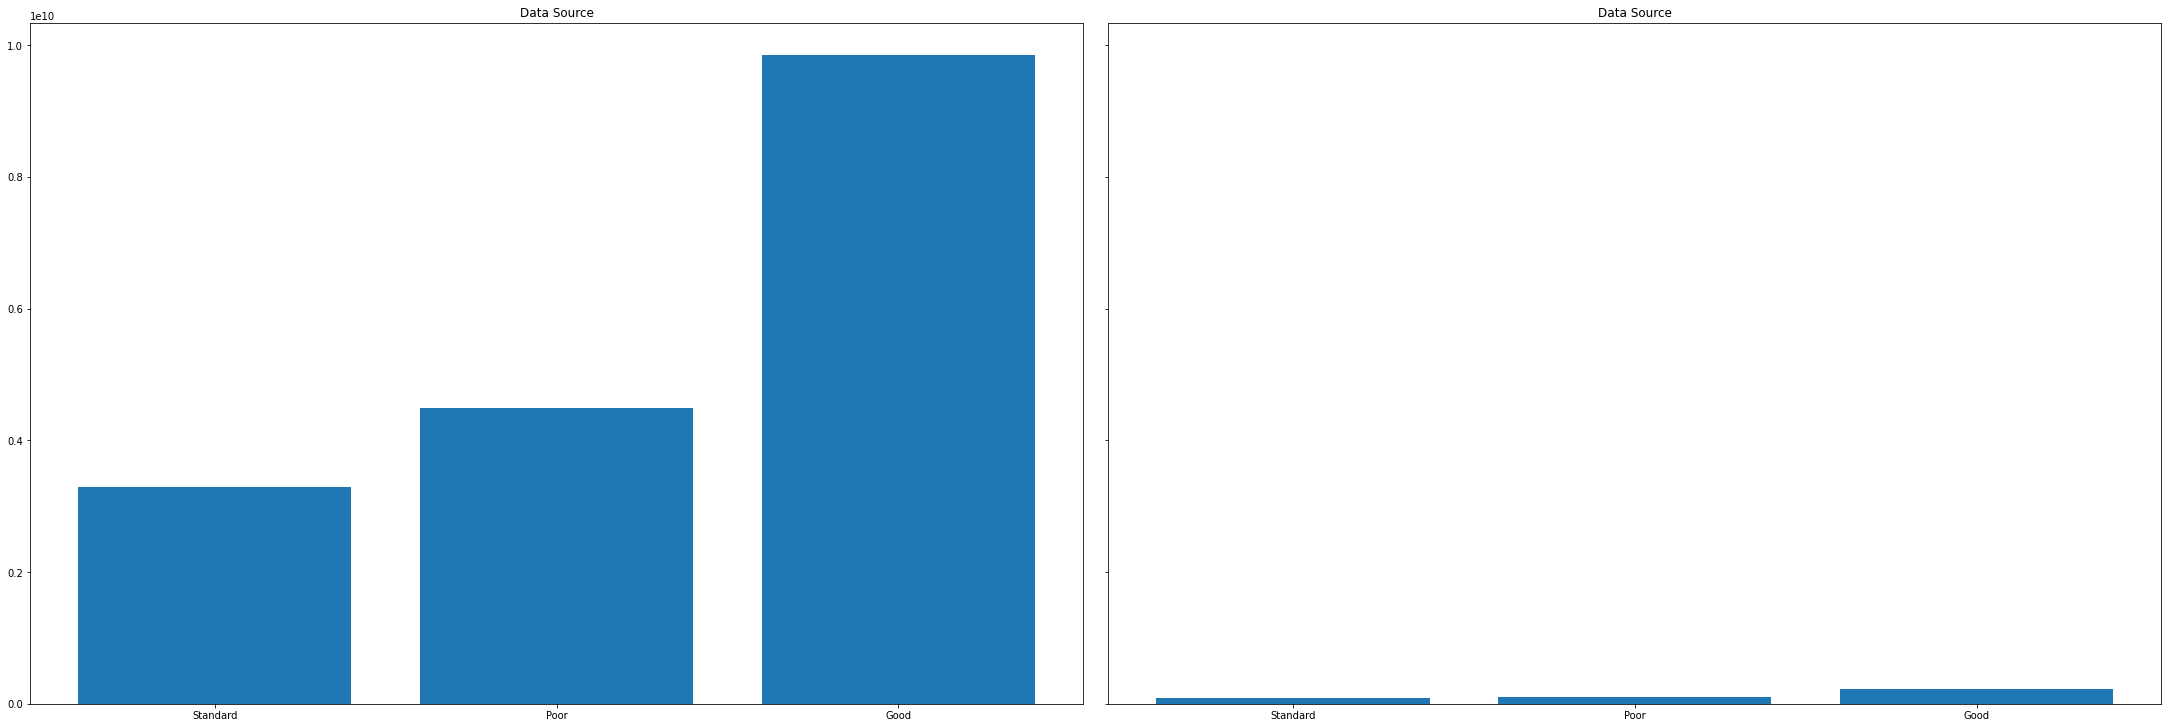

In [45]:
fig,axs=plt.subplots(1,2,figsize=(30, 10),sharey=True,layout='constrained',squeeze=False)
# Data Source
axs[0,0].bar(data.Credit_Score.value_counts().index,data.groupby('Credit_Score')['Annual_Income'].sum())
axs[0,0].set_title('Data Source')
# Data Source
axs[0,1].bar(data.Credit_Score.value_counts().index,data.groupby('Credit_Score')['Monthly_Inhand_Salary'].sum())
axs[0,1].set_title('Data Source')
# Data Source
axs[0,1].bar(data.Credit_Score.value_counts().index,data.groupby('Credit_Score')['Num_Bank_Accounts'].sum())
axs[0,1].set_title('Data Source')
# Data Source
axs[0,1].bar(data.Credit_Score.value_counts().index,data.groupby('Credit_Score')['Num_Credit_Card'].sum())
axs[0,1].set_title('Data Source')
# Data Source
axs[0,1].bar(data.Credit_Score.value_counts().index,data.groupby('Credit_Score')['Interest_Rate'].sum())
axs[0,1].set_title('Data Source')

<BarContainer object of 3 artists>

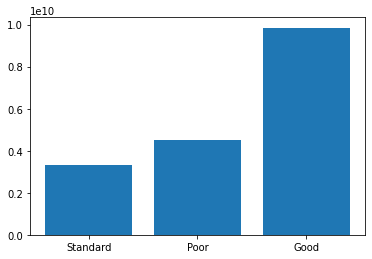

In [46]:
plt.bar(data.Credit_Score.value_counts().index,data.groupby('Credit_Score')['Annual_Income'].sum())

In [47]:
data.select_dtypes(exclude='object').columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [48]:
data.Credit_Score.value_counts().index

Index(['Standard', 'Poor', 'Good'], dtype='object')

In [49]:
data.groupby('Credit_Score')[['Annual_Income']].sum()['Annual_Income']

Credit_Score
Good        3.297041e+09
Poor        4.494068e+09
Standard    9.850413e+09
Name: Annual_Income, dtype: float64

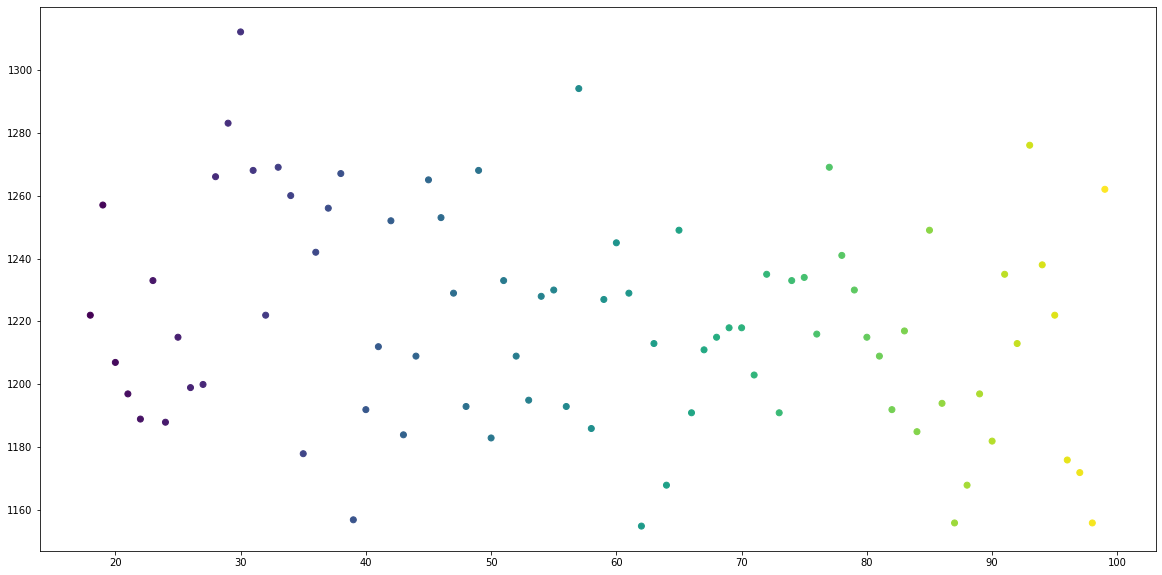

In [50]:
plt.figure(figsize=(20,10))
plt.scatter(data.Age.value_counts().index,data.Age.value_counts(),c=data.Age.value_counts().index)

## Splitting the data into features and label

In [51]:
x,y=data.drop('Credit_Score',axis=1),data['Credit_Score']

In [52]:
x.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [53]:
encode=OrdinalEncoder()
x_encode=pd.DataFrame(encode.fit_transform(x),columns=['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'])
x_encode.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,3.0,4.0,12.0,2585.0,3971.0,4.0,4.0,2.0,4.0,2.0,...,4.0,1.0,806.0,17957.0,265.0,0.0,3662.0,71.0,2.0,312.0
1,2.0,9.0,12.0,2585.0,8059.0,4.0,4.0,2.0,4.0,1.0,...,4.0,1.0,806.0,47808.0,221.0,0.0,3662.0,109.0,3.0,284.0
2,6.0,16.0,12.0,2585.0,8059.0,4.0,4.0,2.0,4.0,0.0,...,4.0,1.0,806.0,28197.0,267.0,0.0,3662.0,72.0,4.0,331.0
3,0.0,64.0,12.0,2585.0,8059.0,4.0,4.0,2.0,4.0,4.0,...,4.0,1.0,806.0,44461.0,268.0,0.0,3662.0,190.0,5.0,223.0
4,7.0,8.0,12.0,2585.0,3971.0,4.0,4.0,2.0,4.0,4.0,...,4.0,1.0,806.0,7373.0,269.0,0.0,3662.0,32.0,1.0,341.0


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x_encode,y,test_size=0.2,random_state=42)

## Modelling

In [55]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
    ], n_jobs=-1)
    
model=model.fit(x_train, y_train)
y_pred=model.predict(x_test)

## Model Evaluation

In [56]:
def credit_function(y_pred,y_test):
    accuracy=accuracy_score(y_pred,y_test)
    recall=recall_score(y_test,y_pred,average='macro')
    precision=precision_score(y_pred,y_test,average='macro')
    f1=f1_score(y_pred,y_test,average='macro')
    
    print(f'Accuracy Score: {accuracy*100:.2f}%')
    print(f'Recall Score: {recall*100:.2f}%')
    print(f'Precision Score: {precision*100:.2f}%')
    print(f'f1 Score Score: {f1*100:.2f}%')    

In [57]:
credit_function(y_pred,y_test)

Accuracy Score: 81.55%
Recall Score: 80.71%
Precision Score: 80.71%
f1 Score Score: 80.69%


In [58]:
print(f'Classification report {classification_report(y_pred,y_test)}')

Classification report               precision    recall  f1-score   support

        Good       0.78      0.78      0.78      3535
        Poor       0.81      0.81      0.81      5880
    Standard       0.83      0.83      0.83     10585

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



## Save Model

In [59]:
pickle.dump(model,open('stackingclassifier.pkl','wb'))